# Read in and prepare the data

In [ ]:
!gdown --id '1XG6tpnEmp74aD0KR6hI80wsX5KkC1Ixc' # reviews
!gdown --id '1DCu90-aikc9TP1wTo1h2_CVSRxYLkvyY' # listings

Downloading...
From: https://drive.google.com/uc?id=1XG6tpnEmp74aD0KR6hI80wsX5KkC1Ixc
To: /content/customers_final_version.csv
42.8MB [00:00, 117MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1DCu90-aikc9TP1wTo1h2_CVSRxYLkvyY
To: /content/listings_final_version.csv
22.5MB [00:00, 137MB/s]


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
listings=pd.read_csv("listings_final_version.csv")
customers=pd.read_csv("customers_final_version.csv")

In [ ]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12222 entries, 0 to 12221
Data columns (total 68 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12222 non-null  int64  
 1   description                     12222 non-null  object 
 2   host_since                      12222 non-null  object 
 3   host_is_superhost               12222 non-null  int64  
 4   latitude                        12222 non-null  float64
 5   longitude                       12222 non-null  float64
 6   accommodates                    12222 non-null  int64  
 7   bathrooms                       12222 non-null  float64
 8   bedrooms                        12222 non-null  float64
 9   beds                            12222 non-null  float64
 10  amenities                       12222 non-null  object 
 11  price                           12222 non-null  float64
 12  minimum_nights                  

In [ ]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130602 entries, 0 to 130601
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   reviewer_id                  130602 non-null  int64  
 1   listing_id                   130602 non-null  int64  
 2   date                         130602 non-null  object 
 3   comments                     130602 non-null  object 
 4   price                        130602 non-null  float64
 5   review_scores_rating         130602 non-null  float64
 6   review_scores_accuracy       130602 non-null  float64
 7   review_scores_cleanliness    130602 non-null  float64
 8   review_scores_checkin        130602 non-null  float64
 9   review_scores_communication  130602 non-null  float64
 10  review_scores_location       130602 non-null  float64
 11  review_scores_value          130602 non-null  float64
 12  polarity_score               130602 non-null  float64
 13 

In [ ]:
listings.columns

Index(['id', 'description', 'host_since', 'host_is_superhost', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'amenities', 'price', 'minimum_nights', 'maximum_nights',
       'maximum_nights_avg_ntm', 'number_of_reviews_ltm', 'instant_bookable',
       'calculated_host_listings_count', 'nearby_sites_rating',
       'nearest_station_dist', 'nearest_site_dist', 'nearest_site_rating',
       'host_response_time_cross_rate', 'email', 'phone', 'reviews', 'jumio',
       'offline_government_id', 'selfie', 'government_id', 'identity_manual',
       'work_email', 'manual_online', 'manual_offline', 'x0_Central Region',
       'x0_East Region', 'x0_North Region', 'x0_North-East Region',
       'x0_West Region', 'x0_apartment', 'x0_bed and breakfast', 'x0_boat',
       'x0_boutique hotel', 'x0_bungalow', 'x0_condominium', 'x0_guest suite',
       'x0_hostel', 'x0_hotel', 'x0_house', 'x0_loft', 'x0_other',
       'x0_townhouse', 'x0_Entire home/apt', 'x0_Ho

In [ ]:
# Combine description and amenties.
listings['dtld_descr'] = listings['description'].str.cat(listings['amenities_list'].apply(lambda x:' '.join(x[1:-1].split(',')).replace("'",'')))

# Hybrid Recommender using Neural Network
Tensorflow version is 1.15. <br>
*Lazy* approach. Hard to maintain but efficient.


## Data Preparation

In [ ]:
!pip install tensorflow==1.15
import os
import tensorflow as tf
import tensorflow_hub as hub

     |████████████████████████████████| 412.3MB 23kB/s 
     |████████████████████████████████| 51kB 4.1MB/s 
     |████████████████████████████████| 3.8MB 24.0MB/s 
     |████████████████████████████████| 512kB 16.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7540 sha256=e280a8764b9c62964f8721416b7bae2b652dcaf72e4898a1c9850405b0be216a
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.4.1
    Uninstalling tensorboard-2.4.1:
      Successfully uninstalled tensorboard-2.4.1
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3
  Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tens

In [206]:
# Determine csv and label columns
num_factor = 10
text_feat = 100

NON_FACTOR_COLUMNS = ["preference",'listing_id',
       'host_is_superhost', 'latitude',
       'longitude','price','number_of_reviews_ltm','calculated_host_listings_count','nearby_sites_rating',
       'nearest_station_dist', 'host_response_time_cross_rate']
FACTOR_COLUMNS1 = ["user_factor_{}".format(i) for i in range(num_factor)] + ["item_factor_{}".format(i) for i in range(num_factor)]
FACTOR_COLUMNS2 = ["text_factor_{}".format(i) for i in range(text_feat)] 
CSV_COLUMNS = NON_FACTOR_COLUMNS + FACTOR_COLUMNS1 + FACTOR_COLUMNS2
LABEL_COLUMN = "preference"

# Set default values for each CSV column
NON_FACTOR_DEFAULTS = [[0.0],['Unknown'],[0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0],[0.0]]
FACTOR_DEFAULTS1 = [[0.0] for i in range(num_factor)] + [[0.0] for i in range(num_factor)] # user and item
FACTOR_DEFAULTS2 = [[0.0] for i in range(text_feat)]
DEFAULTS = NON_FACTOR_DEFAULTS + FACTOR_DEFAULTS1 + FACTOR_DEFAULTS2

In [ ]:
# Text manipulation
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english',max_features=text_feat,ngram_range=(1,1))

tfidf_matrix = tfidf.fit_transform(listings['dtld_descr'])

tfidf_matrix.shape

(12222, 100)

In [180]:
df_pair = customers.drop(['price'],axis=1).merge(listings,left_on='listing_id',right_on='id')

avg_review = (df_pair.review_scores_rating/100 + (df_pair.review_scores_accuracy + df_pair.review_scores_cleanliness + df_pair.review_scores_checkin + \
df_pair.review_scores_communication + df_pair.review_scores_location + df_pair.review_scores_value)/10)/7

df_pair['preference'] = (df_pair['polarity_score']+1)*avg_review/2
df_pair = df_pair[NON_FACTOR_COLUMNS]

In [174]:
df_pair.nunique()

preference                         66281
reviewer_id                       106648
listing_id                          7006
host_is_superhost                      2
latitude                            4217
longitude                           4721
price                                477
number_of_reviews_ltm                 92
calculated_host_listings_count       139
nearby_sites_rating                 6829
nearest_station_dist                6829
host_response_time_cross_rate        139
dtype: int64

In [181]:
df_pair.describe()

,reviewer_id,preference,listing_id,host_is_superhost,latitude,longitude,price,number_of_reviews_ltm,calculated_host_listings_count,nearby_sites_rating,nearest_station_dist,host_response_time_cross_rate
count,1.197520e+05,119752.000000,1.197520e+05,119752.000000,119752.000000,119752.000000,119752.000000,119752.000000,119752.000000,119752.000000,119752.000000,119752.000000
mean,9.615453e+07,0.825014,1.725274e+07,0.268839,1.311528,103.857428,135.892453,19.508927,15.305239,1.994652,0.493154,3.148956
std,8.404637e+07,0.161178,1.044045e+07,0.443358,0.027086,0.039913,129.097117,22.354198,30.487381,1.064402,0.371672,1.138508
min,2.770000e+02,0.001640,4.909100e+04,0.000000,1.243870,103.687460,14.000000,0.000000,1.000000,0.847350,0.003055,0.000000
25%,2.791730e+07,0.772561,8.313733e+06,0.000000,1.296450,103.840018,65.000000,3.000000,2.000000,1.174453,0.250401,2.790000
50%,6.917222e+07,0.872043,1.652530e+07,0.000000,1.309360,103.852750,99.000000,12.000000,6.000000,1.589049,0.403779,3.800000
75%,1.471904e+08,0.931327,2.416825e+07,1.000000,1.315930,103.882920,169.000000,29.000000,14.000000,2.455412,0.594050,4.000000
max,3.850473e+08,0.999850,4.728230e+07,1.000000,1.453790,103.973970,5000.000000,191.000000,352.000000,7.146364,3.350734,4.000000


In [ ]:
rev_uniq = df_pair.reviewer_id.unique()
lst_uniq = df_pair.listing_id.unique()

In [ ]:
!pip install surprise
from surprise import SVD, Reader, Dataset
from surprise.model_selection import KFold

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(df_pair[['reviewer_id', 'listing_id', 'preference']], reader)

SVD = SVD(n_factors=10)

SVD.fit(data.build_full_trainset())

# ARCHIVED:
# print('Grid Search...')

# param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005,0.1],
#               'reg_all': [0.4, 0.6], 'n_factors':[100,500]} # tuning
# grid_search = GridSearchCV(SVD, param_grid, measures=['rmse','mae'], cv=3)
# grid_search.fit(data)
# print('best RMSE score')
# print(grid_search.best_score['rmse'])

     |████████████████████████████████| 11.8MB 5.7MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617572 sha256=c750425766c940ada1d62da0b6990bac661e66a1bc1655fb864fbe917cf6c196
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [ ]:
item_vec = SVD.qi
user_vec = SVD.pu

print(item_vec.shape,user_vec.shape)

(7006, 10) (106648, 10)


In [ ]:
df_cross = df_pair.copy()

item_feats = []
user_feats = []

for (id, pair) in df_cross.iterrows():
  item_feats = item_feats + [item_vec[np.where(lst_uniq == pair.listing_id)[0][0]]]
  user_feats = user_feats + [user_vec[np.where(rev_uniq == pair.reviewer_id)[0][0]]]

for i in range(10):
  df_cross["item_factor_{}".format(i)] = pd.DataFrame(item_feats)[i]
  df_cross["user_factor_{}".format(i)] = pd.DataFrame(user_feats)[i]
# Time: 6min 12s

In [ ]:
# Attach the textual features
for i in range(text_feat):
  df_cross["text_factor_{}".format(i)] = 0.0

tf_df = pd.DataFrame(tfidf_matrix.toarray())
temp = []

for (ind, row) in df_cross.iterrows():
  lst_id = row.listing_id
  lst_ord = listings[listings.id == lst_id].index[0]
  temp.append(list(tf_df.iloc[lst_ord,:].values))

# TIME: 1min 44s

In [ ]:
temp_df = pd.DataFrame(temp)

for i in range(text_feat):
  df_cross["text_factor_{}".format(i)] = temp_df[i]

In [ ]:
number_of_listing_id = df_cross.listing_id.nunique()
number_of_reviewer_id = df_cross.reviewer_id.nunique()

In [ ]:
# KEEP A COPY
# df_cross.to_csv('df_cross.csv')

In [193]:
# IN CASE: df_cross is missing:
!gdown --id '1R80ZMlGRXrcd874ei05Ov9WqlRzzaQD_'
df_cross = pd.read_csv('df_cross.csv',error_bad_lines=False).iloc[:,1:]

Downloading...
From: https://drive.google.com/uc?id=1R80ZMlGRXrcd874ei05Ov9WqlRzzaQD_
To: /content/df_cross.csv
195MB [00:01, 148MB/s]


In [313]:
# Export all possible listings
all_listing = listings[['id'] + df_pair.columns[3:].tolist()].join(tf_df)
all_listing.columns = ['listing_id']+all_listing.columns.tolist()[1:-text_feat]+FACTOR_COLUMNS2

customer_record = df_cross[['listing_id','reviewer_id']].groupby(['reviewer_id']).agg(set).reset_index()

for i in FACTOR_COLUMNS1[:10]:
  customer_record[i] = df_cross[[i,'reviewer_id']].groupby(['reviewer_id']).mean().values

past_listing = df_cross.listing_id.unique()
count = 0
for (ind, listing) in all_listing.iterrows():
  if listing.listing_id in past_listing:
    all_listing.loc[ind, FACTOR_COLUMNS1[10:]] = df_cross.loc[ind, FACTOR_COLUMNS1[:10]].values
  else:
    all_listing.loc[ind, FACTOR_COLUMNS1[10:]] = 0
    count += 1
# TIME: 43s

In [169]:
# Non-reviewed listing count
count

5216

In [314]:
all_listing.to_csv('all_listing.csv',index=False)
#customer_record.to_csv('customer_record.csv',index=False)

In [195]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest = train_test_split(df_cross.drop(['reviewer_id'],axis=1), test_size=0.2, random_state=1)
print(f"Shape of train data: {Xtrain.shape}")
print(f"Shape of test data: {Xtest.shape}")

Xtrain.to_csv('train.csv',header=False,index=False)
Xtest.to_csv('test.csv',header=False,index=False)

Shape of train data: (95801, 131)
Shape of test data: (23951, 131)


## Make auxiliary functions

In [196]:
lat_min = df_cross.latitude.min()
lat_max = df_cross.latitude.max()

lon_min = df_cross.longitude.min()
lon_max = df_cross.longitude.max()

norl_mean = df_cross.number_of_reviews_ltm.mean()
norl_std = df_cross.number_of_reviews_ltm.std()

chlc_mean = df_cross.calculated_host_listings_count.mean()
chlc_std = df_cross.calculated_host_listings_count.std()

nsr_mean = df_cross.nearby_sites_rating.mean()
nsr_std = df_cross.nearby_sites_rating.std()

nsd_mean = df_cross.nearest_station_dist.mean()
nsd_std = df_cross.nearest_station_dist.std()

In [197]:
# Create input function for train and eval
def read_dataset(filename, mode, batch_size = 512):
    def _input_fn(): 
        def decode_csv(value_column):
            columns = tf.decode_csv(records = value_column, record_defaults = DEFAULTS)
            features = dict(zip(CSV_COLUMNS, columns))          
            label = features.pop(LABEL_COLUMN)         
            return features, label

        # Create list of files that match pattern
        file_list = tf.gfile.Glob(filename = filename)

        # Create dataset from file list
        dataset = tf.data.TextLineDataset(filenames = file_list).map(map_func = decode_csv)

        if mode == tf.estimator.ModeKeys.TRAIN:
            num_epochs = None # indefinitely
            dataset = dataset.shuffle(buffer_size = 10 * batch_size)
        else:
            num_epochs = 1 # end-of-input after this

        dataset = dataset.repeat(count = num_epochs).batch(batch_size = batch_size)
        res = dataset.make_one_shot_iterator().get_next()

        # if res.keys() in df_cross.columns:
        #   return dataset.make_one_shot_iterator().get_next()
        # else:
        return res
    return _input_fn

In [198]:
num_listing_embedding = 100
num_reviewer_embedding = 100

# Create feature columns to be used in model
def create_feature_columns():
    # Create listing id feature column
    listing_id_column = tf.feature_column.categorical_column_with_hash_bucket(
        key = "listing_id",
        hash_bucket_size = number_of_listing_id)
    
    embedded_listing_id_column = tf.feature_column.embedding_column(
        categorical_column = listing_id_column,
        dimension = num_listing_embedding)    

    # Create reviewer id feature column
    # reviewer_id_column = tf.feature_column.categorical_column_with_hash_bucket(
    #     key = "reviewer_id",
    #     hash_bucket_size = number_of_reviewer_id)
    
    # embedded_reviewer_id_column = tf.feature_column.embedding_column(
    #     categorical_column = reviewer_id_column,
    #     dimension = num_reviewer_embedding)    

    # Create superhost feature column
    categorical_superhost_column = tf.feature_column.categorical_column_with_identity(
        key = 'host_is_superhost',
        num_buckets = 2)
    
    indicator_superhost_column = tf.feature_column.indicator_column(
        categorical_column = categorical_superhost_column
    )

    # Create bucketized price column
    bucketized_price_column = tf.feature_column.bucketized_column(
        tf.feature_column.numeric_column(key = 'price'),
        boundaries=list(np.arange(0,1000,100)))

    # Create numeric columns: 'number_of_reviews_ltm','calculated_host_listings_count','nearby_sites_rating',
    #'nearest_station_dist','host_response_time_cross_rate'

    number_of_reviews_ltm_column = tf.feature_column.numeric_column(
        key = 'number_of_reviews_ltm', 
        normalizer_fn=lambda x:(x-norl_mean) / norl_std)
    
    calculated_host_listings_count_column = tf.feature_column.numeric_column(
        key = 'calculated_host_listings_count',
        normalizer_fn=lambda x:(x-chlc_mean) / chlc_std)
    
    nearby_sites_rating_column = tf.feature_column.numeric_column(
        key = 'nearby_sites_rating',
        normalizer_fn=lambda x:(x-nsr_mean) / nsr_std)
    
    nearest_station_dist_column = tf.feature_column.numeric_column(
        key = 'nearest_station_dist',
        normalizer_fn=lambda x:(x-nsd_mean) / nsd_std)

    host_response_time_cross_rate_column = tf.feature_column.numeric_column(
        key = 'host_response_time_cross_rate')
  

    # Create lat,lon boundaries list for our binning
    lat_boundaries = list(np.arange(lat_min, lat_max+0.01, 0.05))
    lon_boundaries = list(np.arange(lon_min, lon_max+0.01, 0.05))

    lat_column = tf.feature_column.numeric_column(
        key = "latitude")
    lon_column = tf.feature_column.numeric_column(
        key = "longitude")   
    
    # Create bucketized lat,lon feature column using our boundaries
    lat_bucketized_column = tf.feature_column.bucketized_column(
        source_column = lat_column,
        boundaries = lat_boundaries)
    
    lon_bucketized_column = tf.feature_column.bucketized_column(
        source_column = lon_column,
        boundaries = lon_boundaries)    
    
    # Cross bucketized lat column and bucketized lon column
    crossed_lat_lon_column = tf.feature_column.crossed_column(
        keys = [lat_bucketized_column, lon_bucketized_column],
        hash_bucket_size = len(lat_bucketized_column) * len(lon_bucketized_column))

    # Convert crossed categorical category and bucketized months since epoch column into indicator column so that it can be used in a DNN
    indicator_crossed_lat_lon_column = tf.feature_column.indicator_column(
            categorical_column = crossed_lat_lon_column)    

    # Create user and item factor feature columns from our trained WALS model
    user_factors = [tf.feature_column.numeric_column(key = "user_factor_" + str(i)) for i in range(num_factor)]
    item_factors =  [tf.feature_column.numeric_column(key = "item_factor_" + str(i)) for i in range(num_factor)]
    text_factors = [tf.feature_column.numeric_column(key = "text_factor_" + str(i)) for i in range(text_feat)]

    # Create list of feature columns
    feature_columns = [
      embedded_listing_id_column,    
      # embedded_reviewer_id_column,       
      indicator_superhost_column,
      bucketized_price_column,
      calculated_host_listings_count_column,
      nearby_sites_rating_column,
      nearest_station_dist_column,
      host_response_time_cross_rate_column,
      indicator_crossed_lat_lon_column] + user_factors + item_factors + text_factors

    return feature_columns

In [199]:
# Create custom model function for our custom estimator
def model_fn(features, labels, mode, params):
    # Create neural network input layer using our feature columns defined above
    net = tf.feature_column.input_layer(features = features, feature_columns = params["feature_columns"])

    # Create hidden layers by looping through hidden unit list
    for units in params["hidden_units"]:
        net = tf.nn.dropout(
          net, params['dropout_rate'], seed=1
        )
        net = tf.layers.dense(inputs = net, units = units, activation = tf.nn.relu)

    x_out = tf.layers.Dense(1, activation=tf.nn.sigmoid)(net)

    # If the mode is prediction
    if mode == tf.estimator.ModeKeys.PREDICT:
        # Create predictions dict
        predictions_dict = {
            "preference": tf.expand_dims(input = x_out, axis = -1),
        }

        # Create export outputs
        export_outputs = {"predict_export_outputs": tf.estimator.export.PredictOutput(outputs = predictions_dict)}

        return tf.estimator.EstimatorSpec( # return early since we"re done with what we need for prediction mode
          mode = mode,
          predictions = predictions_dict,
          loss = None,
          train_op = None,
          eval_metric_ops = None,
          export_outputs = export_outputs)


    # Compute loss using sparse softmax cross entropy since this is classification and our labels (content id indices) and probabilities are mutually exclusive
    loss = tf.losses.mean_squared_error(labels, x_out[0])

    # If the mode is evaluation
    if mode == tf.estimator.ModeKeys.EVAL:
        # Metrics
        rmse = tf.metrics.root_mean_squared_error(labels, x_out)
        mae = tf.metrics.mean_absolute_error(labels, x_out)

        # Put eval metrics into a dictionary
        eval_metric_ops = {
            "RMSE": rmse,
            "MAE": mae}

        # Create scalar summaries to see in TensorBoard
        tf.summary.scalar(name = "RMSE", tensor = rmse[1])
        tf.summary.scalar(name = "MAE", tensor = mae[1])   
        
        return tf.estimator.EstimatorSpec( # return early since we"re done with what we need for evaluation mode
            mode = mode,
            predictions = None,
            loss = loss,
            train_op = None,
            eval_metric_ops = eval_metric_ops,
            export_outputs = None)

    # Continue on with training mode

    # If the mode is training
    assert mode == tf.estimator.ModeKeys.TRAIN

    # Create a custom optimizer
    optimizer = tf.train.AdagradOptimizer(learning_rate = params["learning_rate"])

    # Create train op
    train_op = optimizer.minimize(loss = loss, global_step = tf.train.get_global_step())

    return tf.estimator.EstimatorSpec( # final return since we"re done with what we need for training mode
        mode = mode,
        predictions = None,
        loss = loss,
        train_op = train_op,
        eval_metric_ops = None,
        export_outputs = None)

In [200]:
# Create serving input function
def serving_input_fn():  
    feature_placeholders = {
        colname : tf.placeholder(dtype = tf.float64, shape = [None]) \
        for colname in NON_FACTOR_COLUMNS[3:]
    }

 #   feature_placeholders[NON_FACTOR_COLUMNS[0]] = tf.placeholder(dtype = tf.string, shape = [None])
    feature_placeholders[NON_FACTOR_COLUMNS[0]] = tf.placeholder(dtype = tf.float64, shape = [None])
    feature_placeholders[NON_FACTOR_COLUMNS[1]] = tf.placeholder(dtype = tf.string, shape = [None])
    feature_placeholders[NON_FACTOR_COLUMNS[2]] = tf.placeholder(dtype = tf.int64, shape = [None])
    

    for colname in FACTOR_COLUMNS1 + FACTOR_COLUMNS2:
        feature_placeholders[colname] = tf.placeholder(dtype = tf.float64, shape = [None])

    features = {
        key: tf.expand_dims(tensor, -1) \
        for key, tensor in feature_placeholders.items()
    }

    return tf.estimator.export.ServingInputReceiver(features = features, receiver_tensors = feature_placeholders)

## Train, evaluate and predict

In [204]:
# Create train and evaluate loop to combine all of the pieces together.
tf.logging.set_verbosity(tf.logging.INFO)
def train_and_evaluate(args):
    estimator = tf.estimator.Estimator(
        model_fn = model_fn,
        model_dir = args["output_dir"],
        params = {
        "feature_columns": create_feature_columns(),
        "hidden_units": args["hidden_units"],
        "learning_rate": args["learning_rate"],
        "dropout_rate": args["dropout_rate"]
        }
    )

    train_spec = tf.estimator.TrainSpec(
        input_fn = read_dataset(filename = args["train_data_paths"], mode = tf.estimator.ModeKeys.TRAIN, batch_size = args["batch_size"]),
        max_steps = args["train_steps"])

    exporter = tf.estimator.LatestExporter(name = "exporter", 
                                           serving_input_receiver_fn = serving_input_fn)

    eval_spec = tf.estimator.EvalSpec(
        input_fn = read_dataset(filename = args["eval_data_paths"], mode = tf.estimator.ModeKeys.EVAL, batch_size = args["batch_size"]),
        steps = None,
        start_delay_secs = args["start_delay_secs"],
        throttle_secs = args["throttle_secs"],
        exporters = exporter)

    tf.estimator.train_and_evaluate(estimator = estimator, train_spec = train_spec, eval_spec = eval_spec)
    return estimator

In [207]:
# Call train and evaluate loop
import shutil

outdir = "hybrid_recommendation_trained"
shutil.rmtree(path = outdir, ignore_errors = True) # start fresh each time

arguments = {
    "train_data_paths": "train.csv",
    "eval_data_paths": "test.csv",
    "output_dir": outdir,
    "batch_size": 128,
    "learning_rate": 0.1,
    "dropout_rate": 0.75,
    "hidden_units": [256, 128, 64],
    "listing_id_embedding_dimensions": 50,
    "train_steps": 500,
    "start_delay_secs": 30,
    "throttle_secs": 30
}

model = train_and_evaluate(arguments)

INFO:tensorflow:Using default config.


INFO:tensorflow:Using default config.


INFO:tensorflow:Using config: {'_model_dir': 'hybrid_recommendation_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fce73d5ff50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'hybrid_recommendation_trained', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fce73d5ff50>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Not using Distribute Coordinator.


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Running training and evaluation locally (non-distributed).


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


INFO:tensorflow:Start train and evaluate loop. The evaluate will happen after every checkpoint. Checkpoint frequency is determined based on RunConfig arguments: save_checkpoints_steps None or save_checkpoints_secs 600.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into hybrid_recommendation_trained/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into hybrid_recommendation_trained/model.ckpt.


INFO:tensorflow:loss = 0.15192717, step = 1


INFO:tensorflow:loss = 0.15192717, step = 1


INFO:tensorflow:global_step/sec: 15.1828


INFO:tensorflow:global_step/sec: 15.1828


INFO:tensorflow:loss = 0.03404895, step = 101 (6.595 sec)


INFO:tensorflow:loss = 0.03404895, step = 101 (6.595 sec)


INFO:tensorflow:global_step/sec: 16.3321


INFO:tensorflow:global_step/sec: 16.3321


INFO:tensorflow:loss = 0.049168497, step = 201 (6.122 sec)


INFO:tensorflow:loss = 0.049168497, step = 201 (6.122 sec)


INFO:tensorflow:global_step/sec: 16.1442


INFO:tensorflow:global_step/sec: 16.1442


INFO:tensorflow:loss = 0.025663925, step = 301 (6.195 sec)


INFO:tensorflow:loss = 0.025663925, step = 301 (6.195 sec)


INFO:tensorflow:global_step/sec: 16.139


INFO:tensorflow:global_step/sec: 16.139


INFO:tensorflow:loss = 0.014400702, step = 401 (6.193 sec)


INFO:tensorflow:loss = 0.014400702, step = 401 (6.193 sec)


INFO:tensorflow:Saving checkpoints for 500 into hybrid_recommendation_trained/model.ckpt.


INFO:tensorflow:Saving checkpoints for 500 into hybrid_recommendation_trained/model.ckpt.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-04-05T06:30:06Z


INFO:tensorflow:Starting evaluation at 2021-04-05T06:30:06Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2021-04-05-06:30:16


INFO:tensorflow:Finished evaluation at 2021-04-05-06:30:16


INFO:tensorflow:Saving dict for global step 500: MAE = 0.1134879, RMSE = 0.16379103, global_step = 500, loss = 0.026526941


INFO:tensorflow:Saving dict for global step 500: MAE = 0.1134879, RMSE = 0.16379103, global_step = 500, loss = 0.026526941


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 500: hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict_export_outputs', 'serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict_export_outputs', 'serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: hybrid_recommendation_trained/export/exporter/temp-b'1617604216'/saved_model.pb


INFO:tensorflow:SavedModel written to: hybrid_recommendation_trained/export/exporter/temp-b'1617604216'/saved_model.pb


INFO:tensorflow:Loss for final step: 0.022454001.


INFO:tensorflow:Loss for final step: 0.022454001.


In [208]:
export_dir = '/content/exported_model/1'
model.export_saved_model(export_dir,serving_input_fn)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict_export_outputs', 'serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['predict_export_outputs', 'serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Restoring parameters from hybrid_recommendation_trained/model.ckpt-500


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:Assets added to graph.


INFO:tensorflow:No assets to write.


INFO:tensorflow:No assets to write.


INFO:tensorflow:SavedModel written to: /content/exported_model/4/temp-b'1617604220'/saved_model.pb


INFO:tensorflow:SavedModel written to: /content/exported_model/4/temp-b'1617604220'/saved_model.pb


b'/content/exported_model/4/1617604220'

In [211]:
from tensorflow.contrib import predictor

predict_fn = predictor.from_saved_model('/content/exported_model/4/1617604220')
predictions = predict_fn(Xtest.astype({'listing_id':'string','number_of_reviews_ltm':'float64','calculated_host_listings_count':'float64'}))
print(predictions)

INFO:tensorflow:Restoring parameters from /content/exported_model/4/1617604220/variables/variables


INFO:tensorflow:Restoring parameters from /content/exported_model/4/1617604220/variables/variables


{'preference': array([[[0.88810277]],

       [[0.794929  ]],

       [[0.8260367 ]],

       ...,

       [[0.8244647 ]],

       [[0.8540371 ]],

       [[0.8230056 ]]], dtype=float32)}


# TF2 Hybrid Model (eager approach)
Conduct hyperparameter tuning and obtain the loss curve. They are much easier done here.<br>
Note that `create_feature_columns()` as well as some dependencies need to be fulfilled before this session.

In [ ]:
feature_columns = create_feature_columns()

In [ ]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
  dataframe = dataframe.copy()
  labels = dataframe.pop('preference')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [ ]:
batch_size = 128 

train, test = train_test_split(df_cross.astype({'listing_id':'string','number_of_reviews_ltm':'float64','calculated_host_listings_count':'float64'}), test_size=0.2)
train, val = train_test_split(train, test_size=0.2)

train_ds = df_to_dataset(train, batch_size=batch_size)
val_ds = df_to_dataset(val, shuffle=False, batch_size=batch_size)
test_ds = df_to_dataset(test, shuffle=False, batch_size=batch_size)

In [ ]:
# Import tensorboard which catches and plots the learning curve
%load_ext tensorboard

In [ ]:
rm -rf ./logs/

In [ ]:
# Model Parameters
layers = [256, 128, 64]
C=0.04
dropout_rate=0.25
learning_rate=0.1

feature_layer = tf.keras.layers.DenseFeatures(create_feature_columns())

# Most simple tf.keras models are sequential.
model = tf.keras.models.Sequential()

# Add the layer containing the feature columns to the model.
model.add(feature_layer)

# Define the hidden layers
for index, layer in enumerate(layers):
  model.add(tf.keras.layers.Dense(units=layer, 
                                  activation='relu', 
                                  kernel_regularizer=tf.keras.regularizers.l2(C),
                                  name=f'Hidden{index}'))  
  model.add(tf.keras.layers.Dropout(dropout_rate))

# Define the output layer.
model.add(tf.keras.layers.Dense(units=1,  
                                name='Output',activation='sigmoid'))    

                      
model.compile(optimizer=tf.keras.optimizers.Adam(lr=learning_rate),
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.MeanSquaredError(),tf.keras.metrics.MeanAbsoluteError()])

history = model.fit(train_ds,
                 epochs=5, 
                 verbose=1,
                 validation_data=val_ds)

mse_train = history.history['loss']
mse_val = history.history['val_loss']

Train on 599 steps, validate on 150 steps
Epoch 1/5
599/599 [==============================] - 23s 38ms/step - loss: 0.1985 - mean_squared_error: 0.0274 - mean_absolute_error: 0.1156 - val_loss: 0.0265 - val_mean_squared_error: 0.0264 - val_mean_absolute_error: 0.1127
Epoch 2/5
599/599 [==============================] - 18s 30ms/step - loss: 0.0266 - mean_squared_error: 0.0260 - mean_absolute_error: 0.1127 - val_loss: 0.0286 - val_mean_squared_error: 0.0265 - val_mean_absolute_error: 0.1155
Epoch 3/5
599/599 [==============================] - 18s 30ms/step - loss: 0.0496 - mean_squared_error: 0.0260 - mean_absolute_error: 0.1127 - val_loss: 0.0509 - val_mean_squared_error: 0.0264 - val_mean_absolute_error: 0.1134
Epoch 4/5
599/599 [==============================] - 18s 30ms/step - loss: 0.0495 - mean_squared_error: 0.0260 - mean_absolute_error: 0.1128 - val_loss: 0.0480 - val_mean_squared_error: 0.0265 - val_mean_absolute_error: 0.1112
Epoch 5/5
599/599 [==============================]

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
def plot_the_loss_curve(mse_train, mse_val):
  """Plot a curve of loss vs. epoch."""

  plt.figure(figsize=(10, 8))
  plt.xlabel("Epoch")
  plt.ylabel("Mean Squared Error")

  plt.plot(mse_train, label="Training Loss")
  plt.plot(mse_val, label="Validation Loss")
  plt.legend()
  # plt.ylim([mse.min()*0.95, mse.max() * 1.03])
  plt.show() 

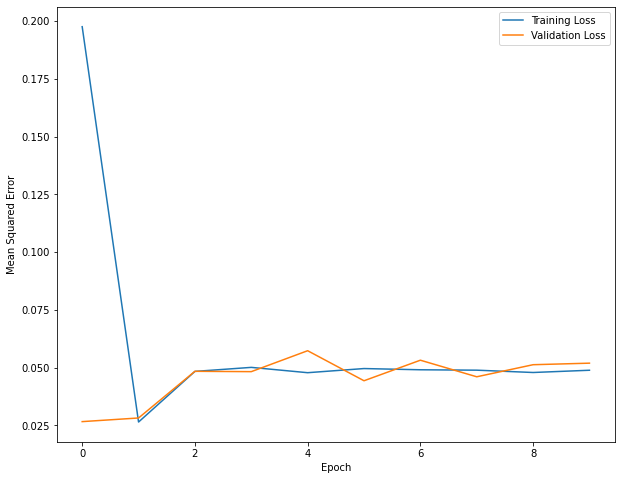

In [ ]:
import matplotlib.pyplot as plt

plot_the_loss_curve(mse_train, mse_val)

In [ ]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True,
    rankdir='TB', expand_nested=False, dpi=96
)

In [ ]:
# Save the model
import os

model_save_path = os.path.join('content/', "nnmodel/1/")
tf.saved_model.save(model, model_save_path)

INFO:tensorflow:Assets written to: content/nnmodel/1/assets


In [ ]:
loaded = tf.compat.v2.saved_model.load(model_save_path)
print(list(loaded.signatures.keys()))  # ["serving_default"]

['serving_default']


In [ ]:
infer = loaded.signatures["serving_default"]
print(infer.structured_outputs)

{'output_1': TensorSpec(shape=(?, 1), dtype=tf.float32, name='output_1')}


In [ ]:
# load the model
imported = tf.compat.v2.keras.models.load_model(model_save_path)

In [ ]:
x = imported.predict(train_ds)

In [ ]:
x

array([[0.8295541],
       [0.8295541],
       [0.8295541],
       ...,
       [0.8295541],
       [0.8295541],
       [0.8295541]], dtype=float32)

In [ ]:
# ARCHIVED:
# [Tensorboard] Plot the loss curve
# !wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
# !unzip ngrok-stable-linux-amd64.zip 
# get_ipython().system_raw('tensorboard --logdir /content/hybrid_recommendation_trained/y --host 0.0.0.0 --port 6006 &')

# get_ipython().system_raw('./ngrok http 6006 &')

# ! curl -s http://localhost:4040/api/tunnels | python3 -c \
#  "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

# # LOAD tensorboard
# %load_ext tensorboard
# %tensorboard --logdir '/content/hybrid_recommendation_trained/export/exporter/1617548400'